# **Part A**

**The three mentioned Kernels are useful for:**
### **Linear**: For Data that are linearly separable. Meaning there is a straight line that can be used as our classifier.
### **Polynomial**: This kernel maps data to its polynomial feature space. And makes the data linearly separable in that dimension. It’s used when data is not linearly separable.
### **RBF**: RBF is used when there is no prior knowledge about data. It’s very costly and is usually approximated by other algorithms.
### **Sigmoid**:this function is equivalent to a two-layer, perceptron model of the neural network, which is used as an activation function for artificial neurons.


# **Part B**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install -U scikit-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 7.5 MB/s 


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('/content/drive/MyDrive/iris.csv')

In [10]:
df.loc[df["species"] == "setosa", "species"] = 0
df.loc[df["species"] == "versicolor", "species"] = 1
df.loc[df["species"] == "virginica", "species"] = 2

In [11]:
y= df['species']

In [12]:
X = df[['petal_length','petal_width']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# **Part B**

### **SVM with Linear Kernel, one-vs-rest**

/root/.local/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


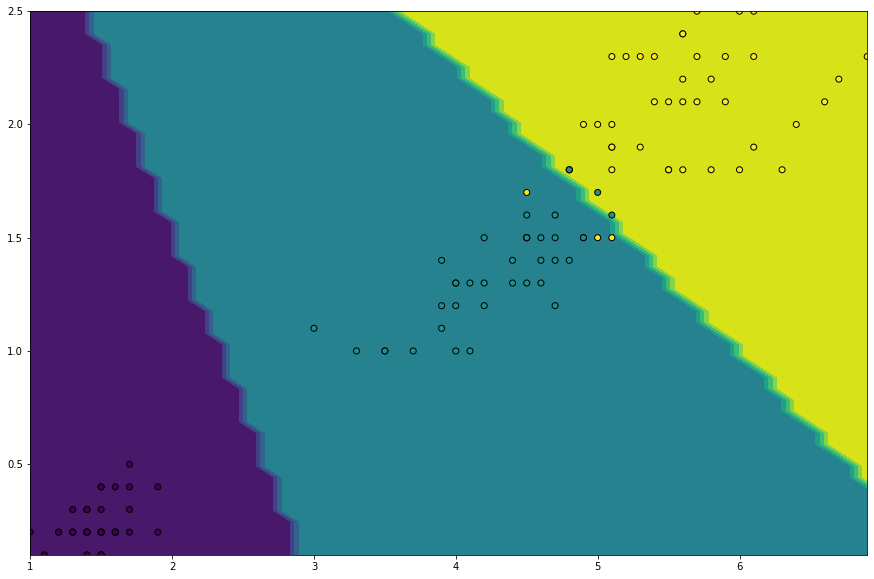

In [14]:
matplotlib.rcParams['figure.figsize'] = (15, 10)

feature_1, feature_2 = np.meshgrid(np.linspace(X_train['petal_length'].min(), X_train['petal_length'].max()),np.linspace(X_train['petal_width'].min(), X_train['petal_width'].max()))
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
svc = SVC(kernel='linear',decision_function_shape='ovr').fit(X_train[['petal_length','petal_width']], y_train.astype('int'))
y_pred = np.reshape(svc.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(X_train['petal_length'], X_train['petal_width'], c=y_train, edgecolor="black")

plt.show()

### **SVM with Linear Kernel, one-vs-one**

/root/.local/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


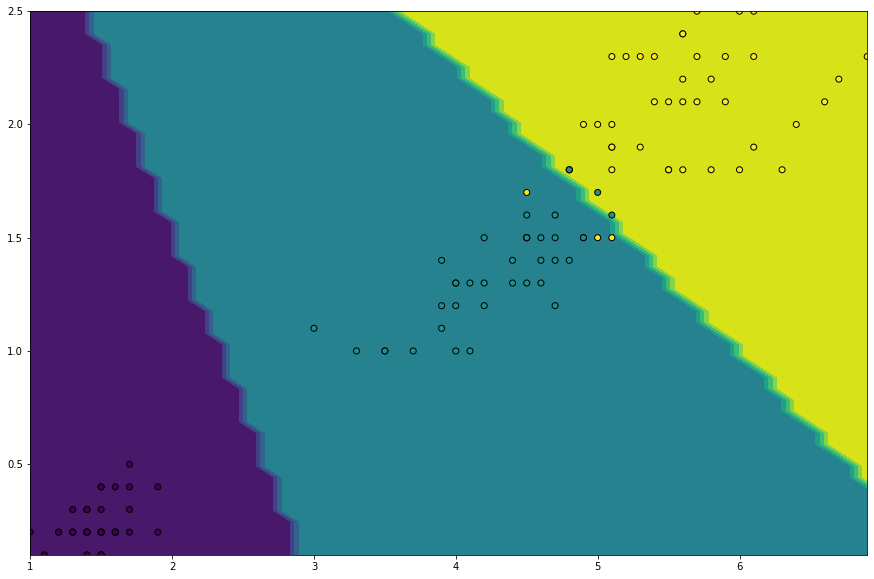

In [15]:
matplotlib.rcParams['figure.figsize'] = (15, 10)

feature_1, feature_2 = np.meshgrid(np.linspace(X_train['petal_length'].min(), X_train['petal_length'].max()),np.linspace(X_train['petal_width'].min(), X_train['petal_width'].max()))
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
svc = SVC(kernel='linear',decision_function_shape='ovo').fit(X_train[['petal_length','petal_width']], y_train.astype('int'))
y_pred = np.reshape(svc.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(X_train['petal_length'], X_train['petal_width'], c=y_train, edgecolor="black")

plt.show()

### **SVM with RBF Kernel, one-vs-rest**

/root/.local/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


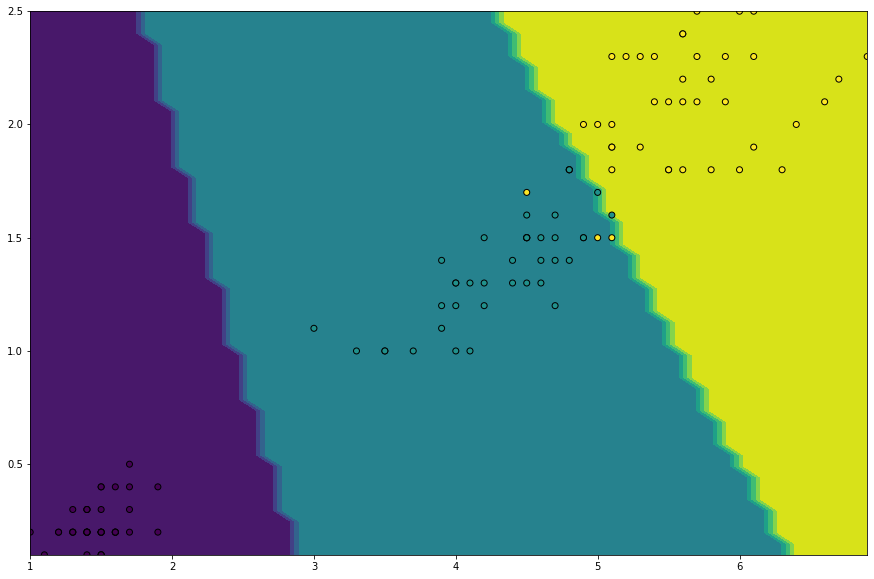

In [16]:
matplotlib.rcParams['figure.figsize'] = (15, 10)

feature_1, feature_2 = np.meshgrid(np.linspace(X_train['petal_length'].min(), X_train['petal_length'].max()),np.linspace(X_train['petal_width'].min(), X_train['petal_width'].max()))
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
svc = SVC(kernel='rbf',decision_function_shape='ovr').fit(X_train[['petal_length','petal_width']], y_train.astype('int'))
y_pred = np.reshape(svc.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(X_train['petal_length'], X_train['petal_width'], c=y_train, edgecolor="black")

plt.show()

### **SVM with Polynomial Kernel(d=5), one-vs-rest**

/root/.local/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


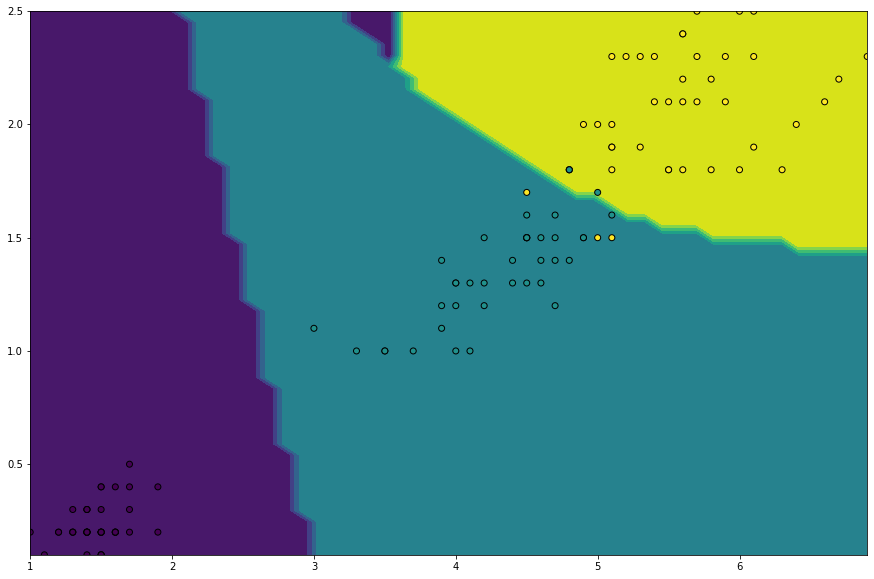

In [18]:
matplotlib.rcParams['figure.figsize'] = (15, 10)

feature_1, feature_2 = np.meshgrid(np.linspace(X_train['petal_length'].min(), X_train['petal_length'].max()),np.linspace(X_train['petal_width'].min(), X_train['petal_width'].max()))
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
svc = SVC(kernel='poly',degree=5,decision_function_shape='ovr').fit(X_train[['petal_length','petal_width']], y_train.astype('int'))
y_pred = np.reshape(svc.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(X_train['petal_length'], X_train['petal_width'], c=y_train, edgecolor="black")

plt.show()

### **Part C**

### **Linear**

In [42]:
svc = SVC(kernel='linear',decision_function_shape='ovr').fit(X_train[['petal_length','petal_width']], y_train.astype('int'))

In [43]:
y_pred_train = svc.predict(X_train)
print('Accuracy on training dataset:') 
accuracy_score(y_train.astype('int'), y_pred_train)

Accuracy on training dataset:


0.95

In [44]:
y_pred_test = svc.predict(X_test)
print('Accuracy on test dataset:') 
accuracy_score(y_test.astype('int'), y_pred_test)

Accuracy on test dataset:


1.0

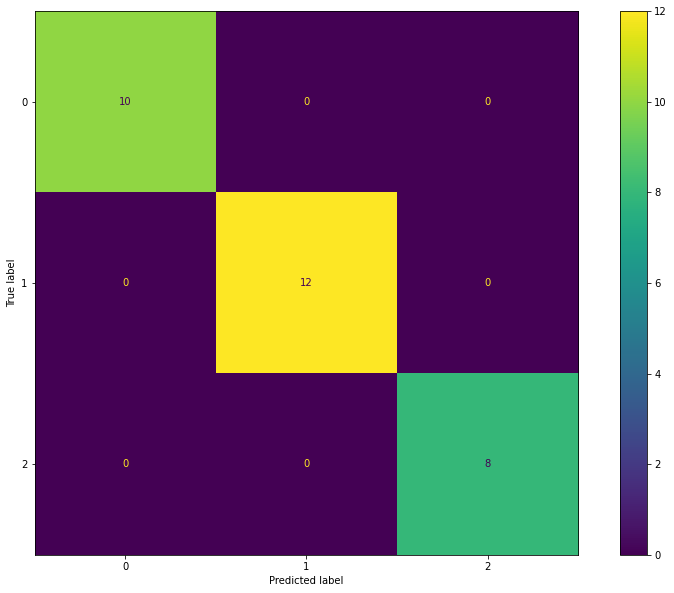

In [45]:
cm = confusion_matrix(y_test.astype('int'), y_pred_test, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

### **RBF**

In [46]:
svc = SVC(kernel='rbf',decision_function_shape='ovr').fit(X_train[['petal_length','petal_width']], y_train.astype('int'))

In [47]:
y_pred_train = svc.predict(X_train)
print('Accuracy on training dataset:') 
accuracy_score(y_train.astype('int'), y_pred_train)

Accuracy on training dataset:


0.9416666666666667

In [48]:
y_pred_test = svc.predict(X_test)
print('Accuracy on test dataset:') 
accuracy_score(y_test.astype('int'), y_pred_test)

Accuracy on test dataset:


0.9333333333333333

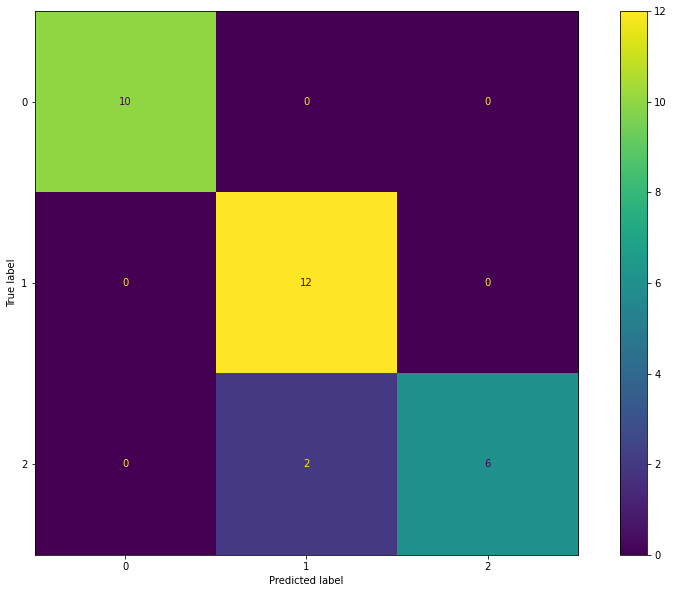

In [49]:
cm = confusion_matrix(y_test.astype('int'), y_pred_test, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

### **Polynomial**

In [50]:
svc = SVC(kernel='poly',degree=5,decision_function_shape='ovr').fit(X_train[['petal_length','petal_width']], y_train.astype('int'))

In [51]:
y_pred_train = svc.predict(X_train)
print('Accuracy on training dataset:') 
accuracy_score(y_train.astype('int'), y_pred_train)

Accuracy on training dataset:


0.9583333333333334

In [52]:
y_pred_test = svc.predict(X_test)
print('Accuracy on test dataset:') 
accuracy_score(y_test.astype('int'), y_pred_test)

Accuracy on test dataset:


0.9666666666666667

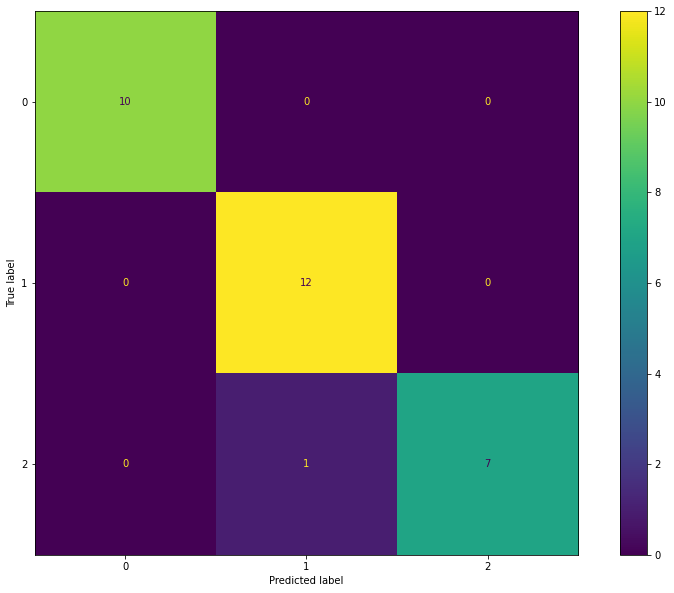

In [53]:
cm = confusion_matrix(y_test.astype('int'), y_pred_test, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

### **Comparison**

### Our data has 3 classes. According to the figure below, it can be seen that these data are linearly separable (except for a few points). For this reason, the linear kernel is the most accurate among the kernels. Poly, rbf kernels cannot make a good distinction by taking the data in another space, and they are not as suitable as the linear kernel for these data.

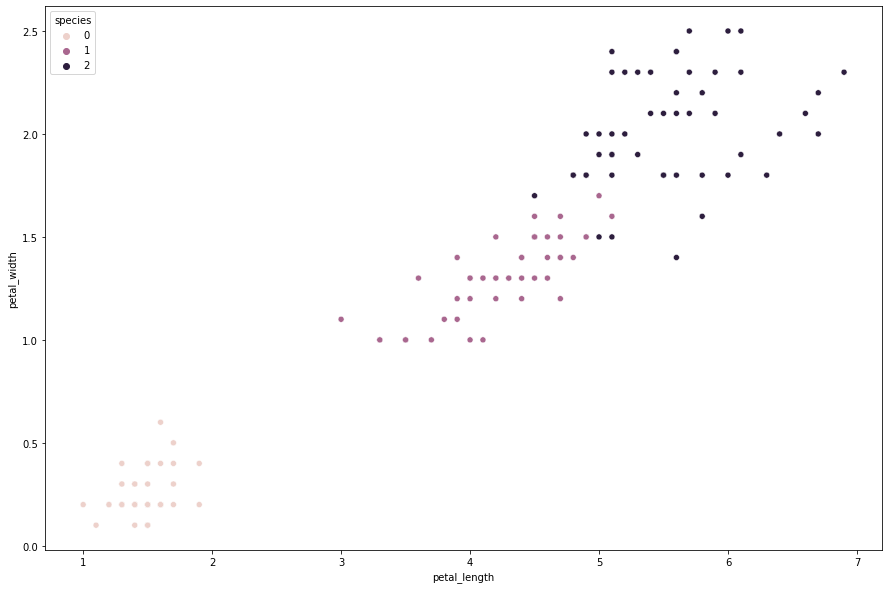

In [56]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue='species')